In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import ipywidgets as widgets
import pickle, inspect
%matplotlib inline

state_polygons = pd.read_csv("../data/state-polygons.csv")
state_polygons.head()

,state,vertex,lat,lon
0,Alaska,0,70.0187,-141.0205
1,Alaska,1,70.1292,-141.7291
2,Alaska,2,70.4515,-144.8163
3,Alaska,3,70.7471,-148.4583
4,Alaska,4,70.7923,-151.1609


In [3]:
def plot_state(state):
    polygon = state_polygons[state_polygons["state"] == state]
    plt.plot("lon", "lat", data=polygon)
    plt.axis(option = "equal");
    
interact(
    plot_state,
    state = widgets.Text(value = "Alaska")
);

interactive(children=(Text(value='Alaska', description='state'), Output()), _dom_classes=('widget-interact',))

In [55]:
def write_to_utils(function):
    func = inspect.getsource(function)
    with open("utils.py", "r+") as f:
        if func.split(" ")[1] not in f.read():
            with open("utils.py", "a") as f:
                f.write(func + "\n")

In [62]:
write_to_utils(plot_state)

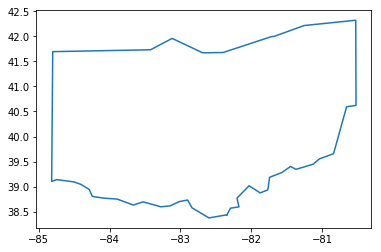

In [64]:
# incomplete polygon
plot_state("Ohio")

lots of incomplete polygons

In [65]:
def get_state(state):
    return state_polygons[state_polygons["state"] == state]

write_to_utils(get_state)

In [66]:
min_vertices = state_polygons.groupby("state")["vertex"].min()
max_vertices = state_polygons.groupby("state")["vertex"].max()

for state in state_polygons["state"].unique():
    specific_state = state_polygons[state_polygons["state"] == state]
    first_vertex = specific_state[specific_state["vertex"] == min_vertices[state]][["lat","lon"]].values[0]
    last_vertex = specific_state[specific_state["vertex"] == max_vertices[state]][["lat","lon"]].values[0]
    if sum(first_vertex == last_vertex) != 2:
        state_polygons = state_polygons.append({
            "state" : state,
            "vertex" : max_vertices[state] + 1,
            "lat" : specific_state[specific_state["vertex"] == min_vertices[state]]["lat"].values[0],
            "lon" : specific_state[specific_state["vertex"] == min_vertices[state]]["lon"].values[0]
        }, ignore_index = True)
        
state_polygons

,state,vertex,lat,lon
0,Alaska,0,70.0187,-141.0205
1,Alaska,1,70.1292,-141.7291
2,Alaska,2,70.4515,-144.8163
3,Alaska,3,70.7471,-148.4583
4,Alaska,4,70.7923,-151.1609
5,Alaska,5,71.1470,-152.6221
6,Alaska,6,71.1185,-153.9954
7,Alaska,7,71.4307,-154.8853
8,Alaska,8,71.5232,-156.7529
9,Alaska,9,71.2796,-157.9449


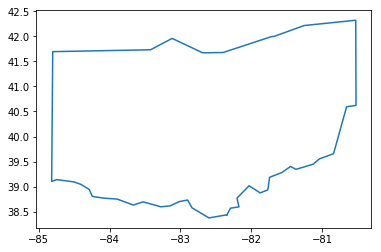

In [67]:
plot_state("Ohio")

In [69]:
state_polygons.to_csv("../data/state-polygons-cleaned.csv", index=False)

In [12]:
def get_coords(state):
    state = state_polygons[state_polygons["state"] == state]
    coords = []
    for i in range(state.shape[0]):
        coords += [(state.iloc[i]["lat"], state.iloc[i]["lon"])]
    return coords

generate polygons for all states

In [26]:
states = state_polygons["state"].unique()
polygons = {}
for state in states:
    polygons[state] = get_coords(state)
    
polygons["Wyoming"]

[(41.0037, -104.0556),
 (44.9949, -104.0584),
 (44.9998, -111.0539),
 (40.9986, -111.0457),
 (41.0006, -104.0556)]

In [24]:
with open("../data/polygons-pickle.txt", "w+b") as f:
    pickle.dump(polygons, f)